In [287]:
#Задание №1
#Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

warnings.filterwarnings("ignore")

In [288]:
#Загружаем данные
data=pd.read_csv('/Users/daraprohorova/Desktop/Эконометрика/forestfires.csv')
#data = pd.read_csv('forestfires.csv')

In [289]:
#Смотрим на наши данные
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [290]:
#Целевая переменная area, значит мы удалим все данные, где целевая переменная имеет значение ноль
data = data[data['area']!=0].reset_index(drop=True)

In [291]:
#Так как у нас есть категориальная переменная сезона, то для того, чтобы отличать зиму, лето, осень и весну друг от друга,
#То преобразуем эту категориальную переменную.
data['summer'] = (data['month'] == 'jun')|(data['month'] == 'jul')|(data['month'] == 'aug')
data['fall'] = (data['month'] == 'oct')|(data['month'] == 'oct')|(data['month'] == 'sep')
data['winter'] = (data['month'] == 'dec')|(data['month'] == 'jan')|(data['month'] == 'feb')
data['spring'] = (data['month'] == 'mar')|(data['month'] == 'apr')|(data['month'] == 'may')

In [292]:
#Посмотрим, правильно ли написан код, и все ли правильно преобразуется
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,fall,winter,spring
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,True,False,False,False
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,False,True,False,False
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,False,True,False,False
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,True,False,False,False
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,True,False,False,False


In [293]:
#Я решила включить в модель следующие факторы: месяц(сезон, который мы создали ранее),температура(temp), влажность(RH), дождь(rain), ветер(wind), остальные индексы (FFMC,DMC,DC,ISI)
# + взять нелиненый признак - решила не брать нелинейный признак, так как решила сделать стандартизацию регрессоров (в будущем знаем, что есть задание с методом главных компонент (РСА), который может применяться только к стандартизированным переменным. Значит, мы сделаем выгодную "подушку безопасности".).
# + взять взаимодействие (температура и влажность)

In [294]:
#Смотрим на описательные статистики данных
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


In [295]:
#Переводим boolean тип данных в int (создаем более очеивдные дамми-переменные)
data['fall'] = data['fall'].apply(lambda x: int(x))
data['summer'] = data['summer'].apply(lambda x: int(x))
data['spring'] = data['spring'].apply(lambda x: int(x))
data['winter'] = data['winter'].apply(lambda x: int(x))

In [296]:
#Посмотрим, правильно ли написан код, и все ли правильно отображается
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,fall,winter,spring
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,1,0,0,0
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,0,1,0,0
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0,1,0,0
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,1,0,0,0
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,1,0,0,0


In [297]:
#Выведем дескриптивные статистики по нашим данным
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,fall,winter,spring
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185,0.462963,0.377778,0.070370,0.088889
std,2.383326,1.170740,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635,0.499552,0.485732,0.256245,0.285112
min,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500,1.000000,1.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000


In [298]:
#Задание №2
#Уберем из регрессии данные, которые нам не нужны для постороения регресии. Я решила, что координаты X и У, день недели и месяц, так как они не несут большой значимости для подсчета площади сгоревшей теорритории.
#Учитывать сезон мы будем с помощью переменных summer, spring, winter, fall.
data = data.drop(['X', 'Y', 'day','month'], axis=1)

In [299]:
#Создадим переменную взаимодействия. Перемножим температуру и влажность. Кажется, что чем больше температура, то по общему правилу (в местах отдаленных от воды - моря, океана, реки), должна быть меньшая влажность.
#Имеется противоволожная зависимость между переменными, поэтому переменная взаимодействия может оказаться полезной.
data['temp_RH'] = data['temp']*data['RH']

In [300]:
#Проверим добавилась ли переменная к массиву данных
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,fall,winter,spring,temp_RH
0,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,1,0,0,0,756.0
1,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,0,1,0,0,824.6
2,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,0,1,0,0,854.1
3,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,1,0,0,0,722.3
4,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,1,0,0,0,1081.2


In [301]:
#Выведем описательные статистики по нашим данным (дисперсия, медиана, среднее, минимум, максимум)
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,fall,winter,spring,temp_RH
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185,0.462963,0.377778,0.070370,0.088889,798.346296
std,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635,0.499552,0.485732,0.256245,0.285112,264.010912
min,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,96.600000
25%,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000,0.000000,0.000000,0.000000,0.000000,677.600000
50%,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000,0.000000,0.000000,0.000000,0.000000,806.450000
75%,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500,1.000000,1.000000,0.000000,0.000000,939.200000
max,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1719.900000


In [302]:
#Таким образом, мы включаем в модель (все признаки мы будем стандартизировать, поэтому нелинейный переменных у нас в модели не будет):
#FFMC - показатель воспламенения мелкого топлива, который вызывает возгарание. Ожидаем получить положительный знак. Если мелкое топливо возгарается, то площадь пораженной территории от пожара может быть больше.
#DMC - показатель воспламенения в органических слоях средней глубины. Ожидаем получить положительный знак. Если есть чему гореть в органический слоях, то оно может загореться и поразить большую площадь.
#DC - индикатор сезонных последствий засухи (коррелирует с сезоном). Возможно появление мультиколлинеарности, но это наше предположение, поэтому пока оставим этот показатель. Ожидаем получить положительный знак. Если была сильная засуха, то вероятность пожара больше, так как большая теорритория засушена.
#ISI - ожидаемая скорость распространения огня, основан на скорости ветра и FFMC. Аналогично, в DC, но также оставим этот признак и будем ожидать положительный знак. Так как чем больше скорость огня, то тем больше поражаемая площадь.
#temp - температура. Чем больше градусов на улице, тем жарче, то тем больше шансов, то может возникнуть пожар (так как например, лес может загореться). В нашем случае парк. Тогда на открытой территории большая площадь может загореться. Ожидаем положительный знак.
#RH - влажность. Чем больше влажность в воздухе, то тем сложнее возникнуть пожару, поэтому ожидаем отрицательный знак. Отрицательно влияет на пораженную площадь от пожара.
#wind - ветер. Так как для возникновения пожара необходимо много кислорода, то чем больше ветра, то тем больше может быть площадь пораженной теорритории, поэтому ожидаемый знак - положительный.
#rain - дождь. Если на улице дождь, то тем меньше шансов получить возгарание (площадь может потушиться дождем), поэтому ожидаем отрицательный знак.
#temp_RH - переменная взаимодействия температуры и влажности. Описание этого регрессора есть выше. Ожидаемый знак отрицательный, так как между самими переменными отрицательная зависимость.
#4 переменные сезона. Очевидно, то летом и осенью пожары происходят чаще, так как темпратура на улице больше, а влажность меньше. Spring - весна и winter - зима: Ожижаем отрицательный знак. Fall - осень и summer - лето: Ожидаем положительный знак.

In [303]:
#Импортируем библиотеки, которые понадобятся для дальнейших действий
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [304]:
#Зададим массив данных, которые будем стандартизировать. Дамми переменные, отражающие сезон, сюда не включаются.
X = data[['FFMC','DMC','DC','ISI','temp','RH','wind', 'rain','temp_RH']]

In [305]:
#Стандартизируем переменные
scaler = StandardScaler()
X_tr = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [306]:
#Посмотрим на дескриптивные статистики наших стандартизированных переменных
X_tr.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,temp_RH
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
mean,9.934440e-16,2.384924e-17,1.546088e-16,4.111937e-17,2.132039e-16,1.891491e-17,-7.072532e-17,-8.809825e-17,3.782982e-17
std,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00
min,-7.437330e+00,-1.808078e+00,-2.420192e+00,-2.023604e+00,-2.774180e+00,-1.908924e+00,-1.973846e+00,-7.264838e-02,-2.662956e+00
25%,-1.915306e-01,-5.157572e-01,-3.675244e-01,-5.742103e-01,-5.165558e-01,-7.130785e-01,-7.511446e-01,-7.264838e-02,-4.582027e-01
50%,1.798757e-01,-4.877056e-02,4.126810e-01,-1.877054e-01,1.279005e-01,-1.815914e-01,-6.005219e-02,-7.264838e-02,3.075158e-02
75%,5.242707e-01,4.311880e-01,6.554333e-01,5.309522e-01,6.629208e-01,6.156392e-01,4.183964e-01,-7.264838e-02,5.345054e-01
max,1.395387e+00,2.863410e+00,1.262151e+00,3.266682e+00,2.267982e+00,3.472382e+00,2.810639e+00,1.602176e+01,3.497072e+00


In [307]:
#Посмотрим на стандартизированные данные (начало таблички)
X_tr.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,temp_RH
0,-1.413795,-1.076790,-1.121592,-1.274751,-0.212567,-0.115156,-0.751145,-0.072648,-0.160694
1,-0.009204,0.239853,0.530300,-0.525897,0.387304,-0.380899,-1.016949,-0.072648,0.099626
2,-0.036215,0.191209,0.503727,-0.525897,0.419730,-0.314463,-1.229593,-0.072648,0.211572
3,1.206308,-0.240105,-0.250777,0.971809,0.646708,-0.845950,0.205753,-0.072648,-0.288577
4,-0.252306,-0.108765,-0.178898,0.802713,0.306241,0.482767,2.544835,-0.072648,1.073361


In [308]:
#Визуализация наших переменных
#Больше выборсов - тогда уберем часть данных, которые выбиваются (Совет от Матвея)

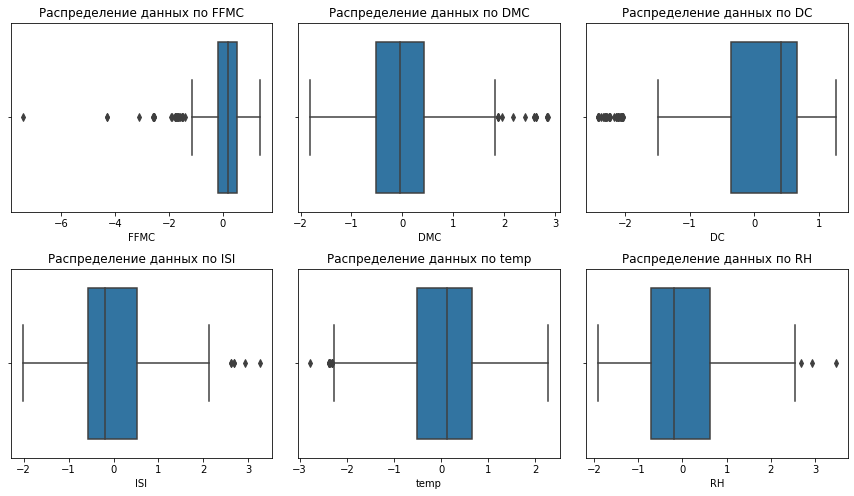

In [309]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231)
ax1.set_title('Распределение данных по FFMC')
sns.boxplot(data=X_tr, x='FFMC')
ax2 = fig.add_subplot(232) 
ax2.set_title('Распределение данных по DMC')
sns.boxplot(data=X_tr, x='DMC')
ax3 = fig.add_subplot(233) 
ax3.set_title('Распределение данных по DC')
sns.boxplot(data=X_tr, x='DC')
ax4 = fig.add_subplot(234) 
ax4.set_title('Распределение данных по ISI')
sns.boxplot(data=X_tr, x='ISI')
ax5 = fig.add_subplot(235) 
ax5.set_title('Распределение данных по temp')
sns.boxplot(data=X_tr, x='temp')
ax6 = fig.add_subplot(236) 
ax6.set_title('Распределение данных по RH')
sns.boxplot(data=X_tr, x='RH')

#Видим, что по всем признакам есть выбросы. Можно подумать над тем, чтобы их убрать из основной выборки, но тогда мы возможно потеряем важные данные, так как медиана близка к нулю. 
#Также логчино, либо убирать выбросы везде, либо не убирать нигде. Посомотрим, как будет выглядеть в дальнейшем регрессия, и может быть решим сократить немного данные, путем удаления наблюдений.
plt.subplots_adjust(wspace=0.1, hspace=0.3) 

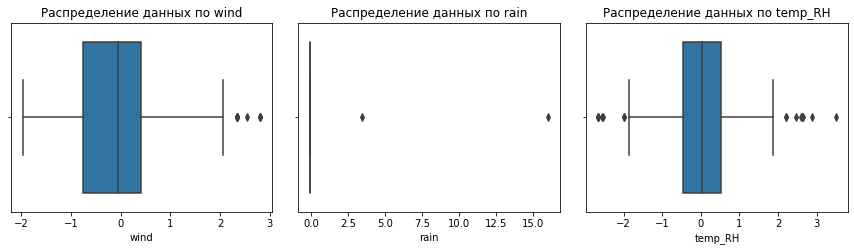

In [310]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231)
ax1.set_title('Распределение данных по wind')
sns.boxplot(data=X_tr, x='wind')
ax2 = fig.add_subplot(232) 
ax2.set_title('Распределение данных по rain')
sns.boxplot(data=X_tr, x='rain')
#Не включать в регрессию rain, так как все наблюдения почти нулевые. Поэтому гистограмму для него мы делать не будем.
ax3 = fig.add_subplot(233) 
ax3.set_title('Распределение данных по temp_RH')
sns.boxplot(data=X_tr, x='temp_RH')

#Насчет 3 выбросов по wind - не стоит беспокоиться, так как скорее всего они не насесут большой урон модели.
#Выбросы в искуственной переменной temp_RH - это нормлаьно, так как мы самостоятельно создали эту переменную.

plt.subplots_adjust(wspace=0.1, hspace=0.3) 

In [311]:
#Удалим из массива данных, который будем использовать для постороения регресии переменную, которая не несет никакой информации.
del X_tr['rain']

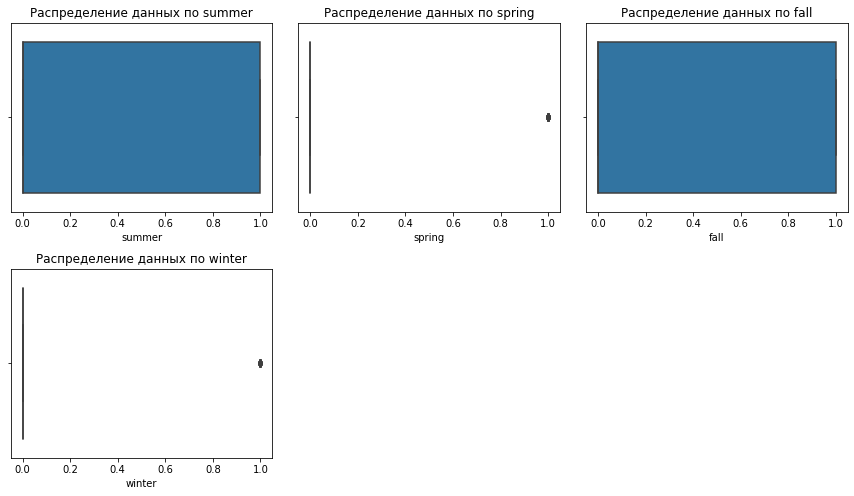

In [312]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231) 
ax1.set_title('Распределение данных по summer')
sns.boxplot(data=data, x='summer')
ax2 = fig.add_subplot(232) 
ax2.set_title('Распределение данных по spring')
sns.boxplot(data=data, x='spring')
ax3 = fig.add_subplot(233) 
ax3.set_title('Распределение данных по fall')
sns.boxplot(data=data, x='fall')
ax4 = fig.add_subplot(234) 
ax4.set_title('Распределение данных по winter')
sns.boxplot(data=data, x='winter')

#Так как ящики с усами для сезонов получились "странными" и не очень информативными (что ожидаемо), то гистограммы для этого распредедения мы строить не будем.

plt.subplots_adjust(wspace=0.1, hspace=0.3) 

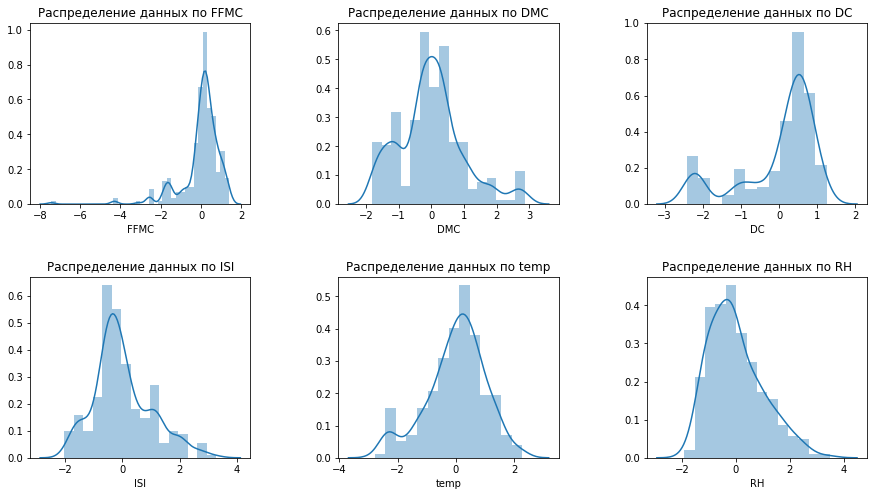

In [313]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231)
ax1.set_title('Распределение данных по FFMC')
sns.distplot(X_tr['FFMC'])
ax2 = fig.add_subplot(232) 
ax2.set_title('Распределение данных по DMC')
sns.distplot(X_tr['DMC'])
#Двумодальное распределение DMC
ax3 = fig.add_subplot(233) 
ax3.set_title('Распределение данных по DC')
sns.distplot(X_tr['DC'])
#Двумодальное распределение DC
ax4 = fig.add_subplot(234) 
ax4.set_title('Распределение данных по ISI')
sns.distplot(X_tr['ISI'])
ax5 = fig.add_subplot(235) 
ax5.set_title('Распределение данных по temp')
sns.distplot(X_tr['temp'])
ax6 = fig.add_subplot(236) 
ax6.set_title('Распределение данных по RH')
sns.distplot(X_tr['RH'])

#Остальные графики имеют одну моду в своем распределении, немного смещены влево или вправо, но это не должно сильно повлиять на модель.
plt.subplots_adjust(wspace=0.4, hspace=0.4)

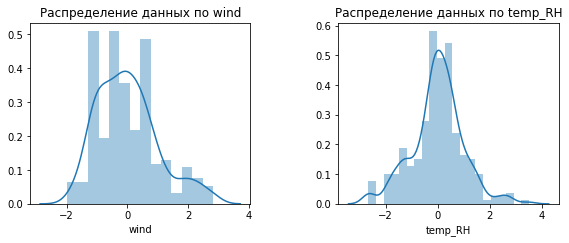

In [314]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231)
ax1.set_title('Распределение данных по wind')
sns.distplot(X_tr['wind'])
#Мы видим наши три выброса (самые большие столбики), однако на сглашенной функции распределения все выглядит довольно неплохо, что говорит о том, что на модель это не сильно повлияет.
ax2 = fig.add_subplot(232)
ax2.set_title('Распределение данных по temp_RH')
sns.distplot(X_tr['temp_RH'])

#rain исключили из регрессии, поэтому для него гистограммы нет.
#Распределение по temp_RH примерно нормлально, так что стоит его включить в регрессию.
plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [315]:
#Гистограмм для сезонов стоить не будем. Причина описана выше.

In [316]:
#Задание 3
#Так как зимой пожары очень редкие, то тогда не будем использовать переменую winter, чтобы избежать мулитиколлинеарности в будущем у регрессоров.

In [317]:
#Добавим константу к нашим данным.
data['const'] = [1 for i in range(X.shape[0])]

In [318]:
#Соединим наши стандартизированные переменные и категориальные переменные (без winter по причине описанной выше)
X = pd.merge(X_tr, data[['summer', 'fall', 'spring']], left_index=True, right_index=True)

In [319]:
#Посомотрим, как соединились две наши таблички с данными
X

,FFMC,DMC,DC,ISI,temp,RH,wind,temp_RH,summer,fall,spring
0,-1.413795,-1.076790,-1.121592,-1.274751,-0.212567,-0.115156,-0.751145,-0.160694,1,0,0
1,-0.009204,0.239853,0.530300,-0.525897,0.387304,-0.380899,-1.016949,0.099626,0,1,0
2,-0.036215,0.191209,0.503727,-0.525897,0.419730,-0.314463,-1.229593,0.211572,0,1,0
3,1.206308,-0.240105,-0.250777,0.971809,0.646708,-0.845950,0.205753,-0.288577,1,0,0
4,-0.252306,-0.108765,-0.178898,0.802713,0.306241,0.482767,2.544835,1.073361,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
265,-0.009204,0.846287,0.791675,-0.501741,0.290028,1.811485,1.853742,2.655395,1,0,0
266,-0.009204,0.846287,0.791675,-0.501741,-0.180142,1.213562,0.684201,1.252473,1,0,0
267,-2.548273,-0.940585,0.412681,-1.757882,1.376281,-0.779514,-0.751145,0.346286,1,0,0
268,-2.548273,-0.940585,0.412681,-1.757882,0.419730,1.811485,0.896845,2.870937,1,0,0


In [320]:
#Посчитаем VIF для нашей спецификации модели
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [321]:
#Выведем табличку с VIF по нашим регрессорам
vif
#Матвей говорил, что CN 30 - это много и это признак мультиколлинерности. VIF > 8 - также признак мультиколлинеарности
#В нашей модели один регрессор больше 8, но будем считать, что все ок. Поэтому по признаку VIF считаем, что мультиколлинеарности нет.

,VIF Factor,features
0,2.885674,FFMC
1,2.964609,DMC
2,6.481419,DC
3,2.659870,ISI
4,9.339413,temp
5,7.989626,RH
6,1.310749,wind
7,7.671102,temp_RH
8,1.491735,summer
9,2.267540,fall


In [322]:
#Импортируем необходимую библиотеку
import statsmodels.api as sm

In [323]:
#Выведем число обусловленности (CN)
norm_xtx = np.dot(X.T,X)
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)
#CN < 30 -  все круто! Значит мультиколлинеарности нет.

11.153779990032483


In [324]:
#Проверив наличие мультиколлинераности между регрессорами, мы получили в ее нет. Поэтому идем дальше.

In [325]:
#Задание 4
#Создадим матрицу регрессоров для посторения линейной модели
X_reg = pd.merge(X_tr, data[['summer', 'fall', 'spring','const']], left_index=True, right_index=True)
model = sm.OLS(data['area'], X_reg)
results = model.fit()
print(results.summary())

#R^2 = 4.4% - видим, что модель не очень хорошо описывает данные, но мы исследователи и нас это не должно волновать :)
#Видим, что Prob(F-statistic) больше чем 0,05 намного, поэтому регрессия в целом незначима. Если говорить про коэффициенты по отдельности, то все оказались незначимы на любом разумном уровне значимости, кроме DMC, который значим на 10% уровне значимости.
#С моими преположения не совпали знаки следующих регрессоров: DC, ISI, RH. Остальные предположения оправдались регрессией.
#JB - проверка на нормальность остаток, p-value = 0, следовательно нулевая гипотеза о нормальности остатков отвергается. Следоватлеьно остатки ненормальны.
#Также видим, что в модели с константой CN = 26.4, ято меньше 30 и опять же говорит об отсуствии мультиколлинеарности.

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.044
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.408
Time:                        17:39:06   Log-Likelihood:                -1581.0
No. Observations:                 270   AIC:                             3186.
Df Residuals:                     258   BIC:                             3229.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           3.1105      9.079      0.343      0.7

In [326]:
#Задание №5
# Посчитаем сейчас этот элемент, так как потом он нам пригодится для подсчета дисперсии у с крышкой
norm_xtx = np.dot(X_reg.T,X_reg)
#Посчитаем сейчас y c крышкой, так как потом он нам пригодится для подсчета RSS
y_hat = model.predict(results.params)

In [327]:
#Точечный прогноз
y_hat_5task = model.predict(results.params, np.median(X_reg,axis=0))
y_hat_5task

1.2703895512531278

In [328]:
#Доверительный интервал для индивидуального прогноза (5% уровень значимости, значит критическое значение распредления 1.96)
#CI = Y_hat +/- 1.96 (Var(y_real - y_hat))^1/2 = Y_hat +/- 1.96 (Var(y_real) + Var(y_hat))^1/2

In [329]:
rss = np.sum(np.square(data['area'] - y_hat))
rss

1927053.8181496523

In [330]:
#n-k = 270 - 12 (так как включая константу) = 258
Var_y_real = rss/258
Var_y_real

7469.200845541288

In [331]:
#Var(y_hat) = Xf(T) * (XtX)^(-1) * (RSS/(n-k)) * Xf
#В качестве независимых переменных взяли медианные значения наблюдений
norm_xtx_reverse = np.linalg.inv(norm_xtx)
Var_y_hat = np.dot(np.dot(np.median(X_reg,axis=0),norm_xtx_reverse),np.median(X_reg,axis=0)) * Var_y_real
Var_y_hat

1805.773325490631

In [332]:
CI_down = y_hat_5task - 1.96*((Var_y_real + Var_y_hat)**(1/2))
CI_down

-187.49067840354581

In [333]:
CI_upper = y_hat_5task + 1.96*((Var_y_real + Var_y_hat)**(1/2))
CI_upper

190.03145750605205

In [334]:
#ДИ для индивидуального прогноза
CI_down,CI_upper
#Так как площадь не может быть отрицательной (что логично), то ДИ берем, начиная с нуля.

(-187.49067840354581, 190.03145750605205)

In [335]:
#Доверительный интервал для среднего (5% уровень значимости, значит критическое значение распредления 1.96)
#CI_mean= Y_hat +/- 1.96 (Var(y_hat))^1/2 
CI_mean_upper = y_hat_5task + 1.96*((Var_y_hat)**(1/2))
CI_mean_down = y_hat_5task - 1.96*((Var_y_hat)**(1/2))
CI_mean_down,CI_mean_upper
#Так как площадь не может быть отрицательной (что логично), то ДИ берем, начиная с нуля.

(-82.0186181700831, 84.55939727258937)

In [336]:
#Задание №6
#Модель с робастными стандратными ошибками
#Предполагаем, что переменная temp и RH (температура и влажность). 
#В зависимости от роста температуры и влажности (погодных условий) будет меняться дсиперсия ошибки, а следовательно и дисперсия зависимой переменной.
#Тем выше температура и ниже влажность, то тем сильнее будет колебаться площадь сгоревшей территории.
model_robust = sm.RLM(data['area'], X_reg)
results_robust = model_robust.fit()
print(results_robust.summary())
#Построив регрессию с робастными ошибками, видим, что у нас на самом деле есть гетерескедастичность по всем регрессорам. проверим это графически и с помощью теста.

                    Robust linear Model Regression Results                    
Dep. Variable:                   area   No. Observations:                  270
Model:                            RLM   Df Residuals:                      258
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 20 Jun 2020                                         
Time:                        17:39:06                                         
No. Iterations:                    42                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           0.3048      0.998      0.306      0.7

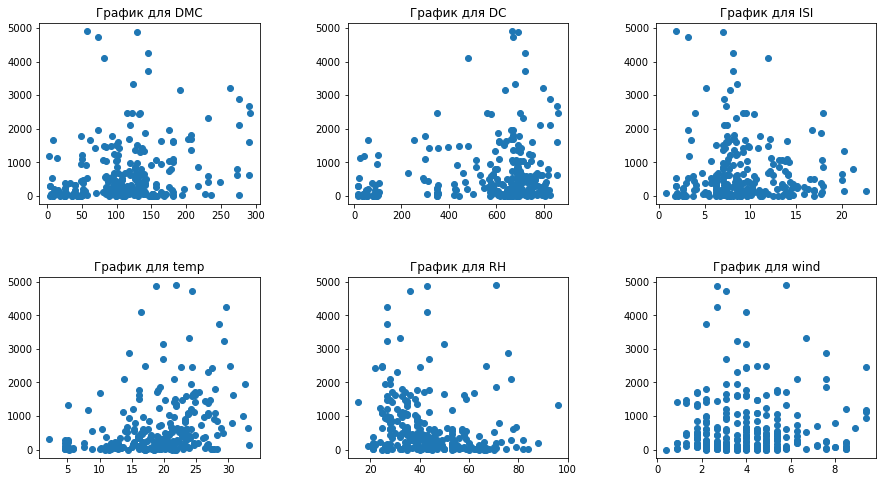

In [337]:
#Задание №7
#Графически с помощью остатков регрессионной модели. Тогда построим вектор квадратов остатков регресионной модели (с обычными ошибками).

errors = data ['area'] - y_hat

errors_1 = (errors**2)
data['errors'] = errors_1 

#Опытным путем построения графиков, выделили границу в 10000 для посторения графиков, чтобы четко было видно распределение ошибок
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231)
ax1.set_title('График для DMC')
plt.scatter(data[data['errors']<10000]['DMC'], data[data['errors']<10000]['errors'])

ax2 = fig.add_subplot(232) 
ax2.set_title('График для DC')
plt.scatter(data[data['errors']<10000]['DC'], data[data['errors']<10000]['errors'])

ax3 = fig.add_subplot(233) 
ax3.set_title('График для ISI')
plt.scatter(data[data['errors']<10000]['ISI'], data[data['errors']<10000]['errors'])

ax4 = fig.add_subplot(234) 
ax4.set_title('График для temp')
plt.scatter(data[data['errors']<10000]['temp'], data[data['errors']<10000]['errors'])

ax5 = fig.add_subplot(235) 
ax5.set_title('График для RH')
plt.scatter(data[data['errors']<10000]['RH'], data[data['errors']<10000]['errors'])

ax6 = fig.add_subplot(236) 
ax6.set_title('График для wind')
plt.scatter(data[data['errors']<10000]['wind'], data[data['errors']<10000]['errors'])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

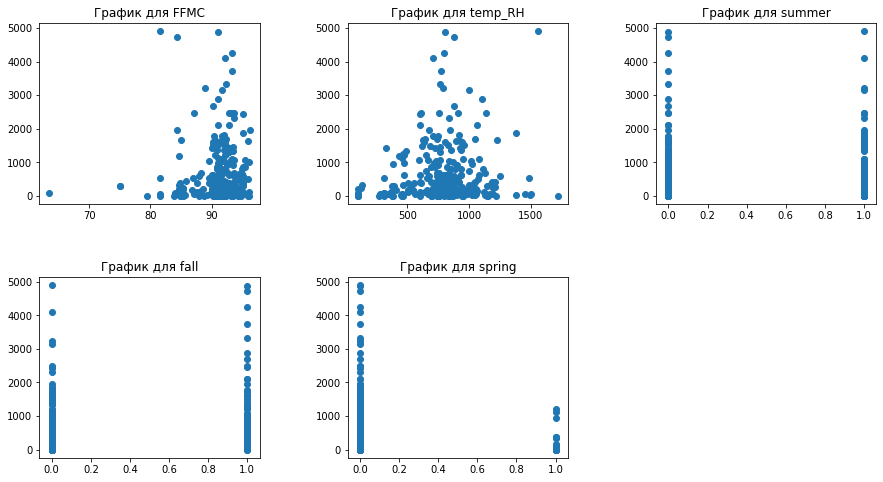

In [338]:
fig = plt.figure(figsize= (15,8))
ax1 = fig.add_subplot(231) 
ax1.set_title('График для FFMC')
plt.scatter(data[data['errors']<10000]['FFMC'], data[data['errors']<10000]['errors'])

ax2 = fig.add_subplot(232) 
ax2.set_title('График для temp_RH')
plt.scatter(data[data['errors']<10000]['temp_RH'], data[data['errors']<10000]['errors'])

ax3 = fig.add_subplot(233) 
ax3.set_title('График для summer')
plt.scatter(data[data['errors']<10000]['summer'], data[data['errors']<10000]['errors'])

ax4 = fig.add_subplot(234) 
ax4.set_title('График для fall')
plt.scatter(data[data['errors']<10000]['fall'], data[data['errors']<10000]['errors'])

ax5 = fig.add_subplot(235) 
ax5.set_title('График для spring')
plt.scatter(data[data['errors']<10000]['spring'], data[data['errors']<10000]['errors'])

plt.subplots_adjust(wspace=0.4, hspace=0.4)


In [339]:
#Видим, что для всех регрессоров (включая наши предположения) имеются непостоянные стандартные ошибки, что говорит о наличии гетерескедастичности.

In [340]:
#Задание №7
#Тест Голфельда - Квандта
#Импортируем нужную команду из библиотеки
from statsmodels.stats.diagnostic import het_goldfeldquandt
for i in X_reg.columns:
    print(i,het_goldfeldquandt(data['area'], X_reg[[i]], alternative='two-sided'))
    
#Критическое значение, p-value, тип теста
#Но - гипотеза о гомоскедастичности. Так как p-value очень маленькое, то нулевая гипотеза отвергается. Следовательно, по всем переменным у нас есть гетероскедастичность. 
#Результаты по выбранным подтвердились, но также мы видим гетероскедастичность по всем переменным.

FFMC (0.532860391805541, 0.0003093248473901327, 'two-sided')
DMC (0.5174803731494866, 0.00016171954235805715, 'two-sided')
DC (0.5374442938607396, 0.00037220982162000085, 'two-sided')
ISI (0.5359240468572781, 0.00035019408461457307, 'two-sided')
temp (0.520178591897242, 0.00018178007748285543, 'two-sided')
RH (0.5464254745749038, 0.0005293162040182722, 'two-sided')
wind (0.5363854545611039, 0.00035674988138060837, 'two-sided')
temp_RH (0.5361634124530734, 0.0003535815071091756, 'two-sided')
summer (0.484471085513276, 3.4391051166344304e-05, 'two-sided')
fall (0.5965535840902062, 0.002996771206084057, 'two-sided')
spring (0.5367275965458199, 0.00036168159184219595, 'two-sided')
const (0.5250730566153087, 0.0002239537664358476, 'two-sided')


In [341]:
#Задание №8
#Предположение : ковариционная матрица ошибок диагональна
#Пакетная реализация модели взвешенного МНК
#Зафикисируем полученные результаты
np.random.seed(103) 
model_wls = sm.WLS(data['area'], X_reg, weights=np.random.randint(0, 10, size=X.shape[0]))
results_wls = model_wls.fit()
print(results_wls.summary())

#Коэффициенты в модели изменились, стандартные ошибки тоже. Значимость коэффицентов изменилась по сравнению с обычной МНК моделью.
#Значимость модели в целом не изменилась (она попрежнему не значима), однавко коэффициенты теперь значимы: DMC (5%), DC (10%)

                            WLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.044
Model:                            WLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.082
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.376
Time:                        17:39:07   Log-Likelihood:                   -inf
No. Observations:                 270   AIC:                               inf
Df Residuals:                     258   BIC:                               inf
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           3.3754      8.539      0.395      0.6

In [342]:
#Задание №9
#Реализация вручную (HC0)
#Построили диагональную матрицу, где по диагонали лежат квадраты ошибок, которые являются оценками дисперсий
#Оценки дисперсий в форме Уайта
np.diag((data['area']-y_hat)**2)

array([[ 437.8076086 ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , 1518.21055787,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        , 1353.78960817, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,   23.69559816,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        4905.21771164,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,  527.89132437]])

In [343]:
#Идея: Новая оценка стандартной ошибки для каждого коэффицента. В ней дисперсия случайной ошибки заменяется на оценку НС0.
model_HC0= sm.OLS(data['area'], X_reg)
results_HC0 = model_HC0.fit(cov_type = 'HC0')
results_HC0.HC0_se
print(results_HC0.summary())

#Значимость модели в целом неизменилась по сравнению с обычной МНК моделью (по-прежнему не значима). Касательно коэффициентов, то теперь DMC и DC значимы на 5% уровне значимости

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                    0.8940
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.547
Time:                        17:39:07   Log-Likelihood:                -1581.0
No. Observations:                 270   AIC:                             3186.
Df Residuals:                     258   BIC:                             3229.
Df Model:                          11                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           3.1105      3.639      0.855      0.3

In [344]:
#Бонусное задание для НС3
#Идея:Новая оценка стандартной ошибки для каждого коэффицента. В ней дисперсия случайной ошибки заменяется на оценку НС3 (где применятся кросс-валидация Leave-one-out)
model_HC3= sm.OLS(data['area'], X_reg)
results_HC3 = model_HC0.fit(cov_type = 'HC3')
results_HC3.HC3_se
print(results_HC3.summary())
#Значимость модели в целом неизменилась по сравнению с обычной МНК моделью (по-прежнему не значима). Касательно коэффициентов, то теперь DMC и DC значимы на 5% уровне значимости

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                    0.7919
Date:                Sat, 20 Jun 2020   Prob (F-statistic):              0.648
Time:                        17:39:07   Log-Likelihood:                -1581.0
No. Observations:                 270   AIC:                             3186.
Df Residuals:                     258   BIC:                             3229.
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FFMC           3.1105      3.929      0.792      0.4

In [345]:
#Задание №10
#PCA можно применять только к стаднартизированным данным. Мы то сделали в начале (наше "выгодное вложение")
#Импортируем нужную команду из библиотеки
#Преобразуем независимые переменные
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_reg, data['area'])
pca.components_

array([[-4.18468511e-01, -4.13111412e-01, -3.93725039e-01,
        -3.48942856e-01, -4.46359984e-01,  1.15944906e-01,
         1.63335035e-01, -3.37927259e-01, -1.32826723e-01,
        -3.03400785e-02,  7.29757637e-02, -0.00000000e+00],
       [-2.00858450e-01,  2.24536160e-01,  1.38309040e-01,
        -1.37455645e-01, -2.19540966e-01,  7.37831306e-01,
         9.69406524e-02,  5.13867317e-01,  5.41355617e-02,
        -3.38435087e-03, -4.71535483e-02,  0.00000000e+00],
       [-2.55787665e-01,  6.50388697e-02,  3.15387756e-01,
        -5.41105876e-01,  9.24173352e-02, -1.13683951e-01,
        -6.55071423e-01, -1.80779959e-02, -1.65258268e-01,
         2.37693450e-01, -5.79547443e-02, -0.00000000e+00],
       [-6.32935533e-02,  3.15953620e-01,  5.31949592e-01,
        -1.16225994e-01, -1.82222472e-01, -1.47280028e-01,
         5.75883666e-01, -2.94626987e-01, -2.18504141e-01,
         2.68728772e-01, -7.99104490e-02,  0.00000000e+00],
       [-4.44616739e-01,  9.79383160e-02, -1.3846533

In [346]:
#Выделим первые 2 главыне компоненты
pca.components_[:2]

array([[-0.41846851, -0.41311141, -0.39372504, -0.34894286, -0.44635998,
         0.11594491,  0.16333504, -0.33792726, -0.13282672, -0.03034008,
         0.07297576, -0.        ],
       [-0.20085845,  0.22453616,  0.13830904, -0.13745565, -0.21954097,
         0.73783131,  0.09694065,  0.51386732,  0.05413556, -0.00338435,
        -0.04715355,  0.        ]])

In [347]:
#Доля дисперсии обьясненная каждой главной компонентной
pca.explained_variance_ratio_

array([0.40833842, 0.18305721, 0.14376795, 0.09274546, 0.0682706 ,
       0.04777765, 0.03008734, 0.01630581, 0.00556644, 0.00329048,
       0.00079265, 0.        ])

In [348]:
#Доля дисперсии обьясненная первыми двумя главными компонентами
sum(pca.explained_variance_ratio_[:2])

0.5913956273511687

In [349]:
#Построим регрессию зависимой переменной на первые две главные компоненты
pca_reg = PCA(n_components=2)
X_reg_pca = pca_reg.fit_transform(X_reg)
pca_reg.explained_variance_ratio_

model_pca = sm.OLS (data ['area'], X_reg_pca)
results_pca = model_pca.fit()
results_pca.summary()

#Если сранивать R^2 c обычной OLS моделью, то мы видим, что в такой спецификаии модели этот показатель уменьшился.
#Гипотеза о том, что модель, которая просто предсказывает, как среднее, не хуже, чем наша не отвергается. Поэтому можно не заморачиваться с главными компонентами и брать просто среднее.
#Переменные в этой регрессии незначимы на разумным уровнях значимости (до 10%) (смотрим на p-value)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   area   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1.346
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                       0.262
Time:                        17:39:07   Log-Likelihood:                         -1596.0
No. Observations:                 270   AIC:                                      3196.
Df Residuals:                     268   BIC:                                      3203.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.3555      2.918     -1.150      0.251      -9.100       2.389
x2            -5.0995      4.358     -1.170      0.243     -13.680       3.481
==============================================================================
Omnibus:                      460.583   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116153.607
Skew:                           9.248   Prob(JB):                         0.00
Kurtosis:                     102.913   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
#Задание №11
#Оценки ML модели совпадают с МНК оценками
#Матричный вид функции правдоподобия
#X_reg - матрица регрессоров 
#sigma2 - дисперсия случайной ошибки
#beta - оценки, которые мы хотим найти
# @ - матричное перемножение
def likelihood(beta, sigma2):
    return 1/((2*np.pi)**(X_reg.shape[0]/2)*(sigma2**(X_reg.shape[0]/2)) * np.exp(-((data['area']-X_reg@beta).T@(data['area']-X_reg@beta))/(2*sigma2)))

In [351]:
beta = np.linalg.inv(X_reg.T@X_reg)@X_reg.T@data['area']
beta
#Совпало с МНК оценками пункт (а)

0      3.110491
1     15.807419
2    -23.082768
3     -6.864582
4     19.852223
5      3.458177
6      7.032476
7    -11.334231
8      7.563005
9     37.592489
10   -18.918731
11     8.578852
dtype: float64

In [352]:
#Дисперсия случайной ошибки 
sigma2 = (data['area'] - np.dot(X_reg, beta)).T@(data['area'] - np.dot(X_reg, beta))/X_reg.shape[0]
sigma2

7137.23636351723